# Part I - Ford GoBike System Data Analysis
## by (Emmanuel Kibet)

## Introduction
> Ford GoBike System Data:is a dataset that contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset includes data for the period of June 2017 to April 2018 and contains more than 1.8 million rows of data.

> The data provides various information about each ride, including the start and end time of the ride, the start and end station, the duration of the ride, and the user type (subscriber or customer). The dataset also includes information about the gender and birth year of users, but this information is not available for all rides.

>This dataset can be used to analyze various aspects of bike-sharing, such as usage patterns, popular routes, and peak usage times. It can also be used to identify user demographics and trends in user behavior. Additionally, this dataset can be used to develop models to predict future usage patterns and optimize bike-sharing systems.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from scipy import stats
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
base_color = sns.color_palette()[0]

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# filter warnings
import warnings
warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# data shape
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.shape

(183412, 16)

In [7]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data Wrangling

### Data issues noted
> Dates not in correct datatime format.<br>
> There are some data missing, start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

## Define

In [9]:
### check on missing data
mis_cols = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']

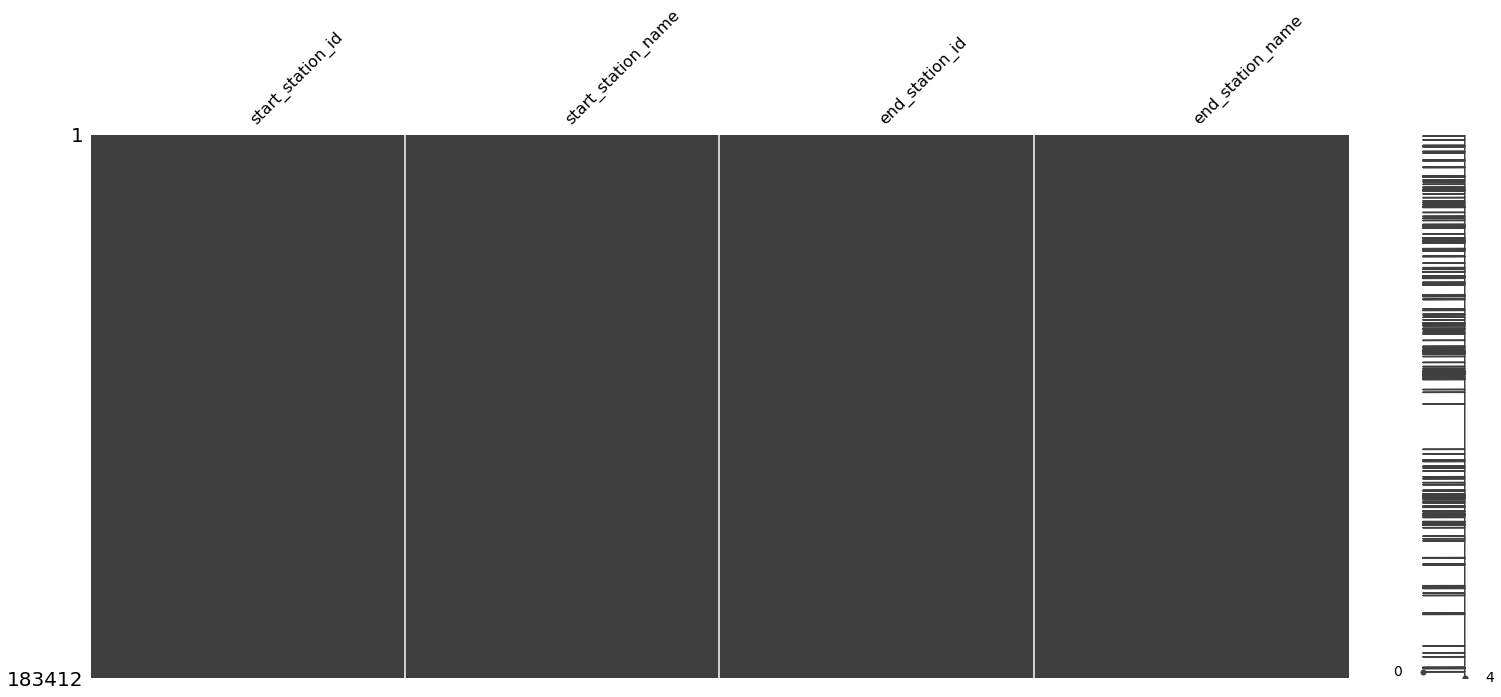

In [10]:
# Gives positional information of the missing values
msno.matrix(df[mis_cols])

In [11]:
miss_data = df[df['start_station_id'].isna()]

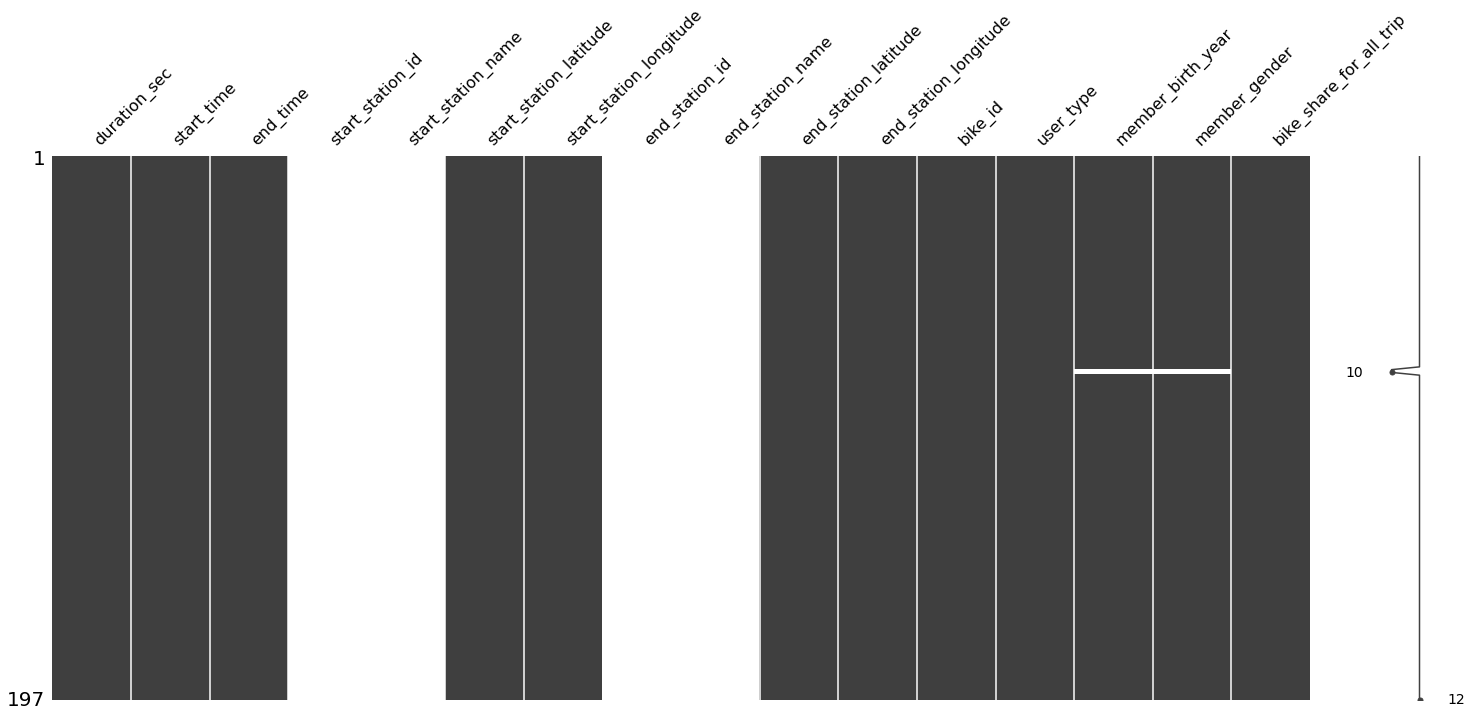

In [12]:
msno.matrix(miss_data)

> The data missing in the 4 columns show some relation and since it's missing all across, there is need to drop them.
> also drop data with missing member_gender and member_birth_year.

## code

In [13]:
df = df.dropna(subset=['start_station_id', 'member_gender'])

## Test

In [14]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
## new dataframe shape
df.shape

(174952, 16)

### Define
> Convert dates to datetime columns

### Code

In [16]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

## Test

In [17]:
df[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

### What is the structure of your dataset?

> The dataset has 183412 rows and 16 columns. Each row in the dataset represents a single ride taken in the bike-sharing system, and each column represents a specific attribute of the ride. The structure of the dataset is as follows:

**Trip Duration (seconds):** The length of time the ride took in seconds.<br>
**Start Time and Date:** The date and time when the ride started.<br>
**End Time and Date:** The date and time when the ride ended.<br>
**Start Station Name:** The name of the station where the ride started.<br>
**Start Station ID:** The ID of the station where the ride started.<br>
**End Station Name:** The name of the station where the ride ended.<br>
**End Station ID:** The ID of the station where the ride ended.<br>
**Bike ID:** The ID of the bike used for the ride.<br>
**User Type**: The type of user who took the ride, either "Subscriber" or "Customer".<br>
**Birth Year:** The birth year of the user (only available for subscribers).<br>
**Gender:** The gender of the user (only available for subscribers).<br>
**Start Station Latitude:** The latitude of the station where the ride started.<br>
**Start Station Longitude:** The longitude of the station where the ride started.<br>
**End Station Latitude:** The latitude of the station where the ride ended.<br>
**End Station Longitude:** The longitude of the station where the ride ended.<br>

### What is/are the main feature(s) of interest in your dataset?

> start and end time of the ride, the start and end station, the duration of the ride, the bike ID, and the user type. Additional features of interest include the user demographics such as gender and birth year, as well as the geographic locations of the bike stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **Trip Duration (seconds):** This feature will help in understanding the length of the rides and identifying patterns in ride duration, such as peak usage times and durations of popular routes.
Start Time and Date and End Time and Date: These features will help in analyzing the temporal aspects of bike-sharing usage, such as the time of day, day of the week, and seasonality of ride patterns.

> **Start Station Name and End Station Name:** These features will help in identifying popular routes and stations, as well as analyzing the usage of the bike-sharing system across different areas.

> **User Type**: This feature will help in understanding the different types of users in the bike-sharing system and identifying patterns in usage behavior between subscribers and customers.

> **Gender** and **Birth Year**: These features will help in identifying the demographics of users and analyzing how usage patterns vary by age and gender.

## Univariate Exploration

### Questions to answer from data
> 1. Which time to people love to start their riding.<br>
> 2. Which user_type is the most common among other riders<br>
> 3. Which station has the most riders start from <br>
> 4. which stations has the most riders ending their journey there? <br>
> 5. which gender is the most dominant for riding<br>
> 6. which day of the week do people love to ride<br>
> 7. whats the age distibution of the rides<br>
> 8.  What is the distribution of duration seconds<br>

#### 1. Which time to people love to start their riding.

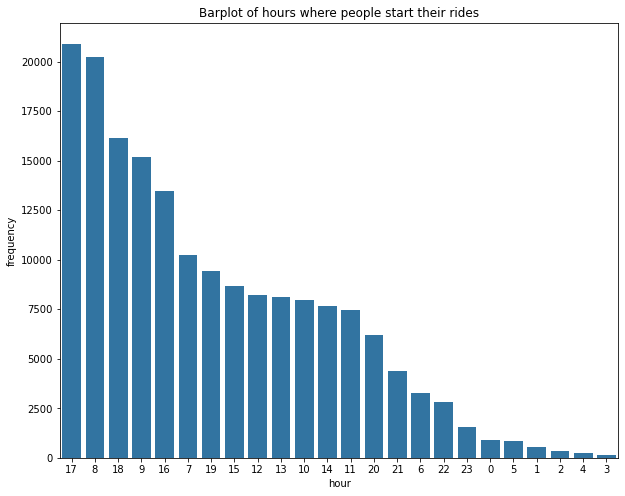

In [18]:
# get hoours from start time from 
df['hour'] = df['start_time'].dt.hour

# get order of bars by frequency
hr_counts = df['hour'].value_counts()
hr_order = hr_counts.index

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='hour', color = base_color, order=hr_order)
plt.title('Barplot of hours where people start their rides')
plt.ylabel('frequency')
plt.show()

> 17 seems the hour most people like to start the riding followed by 8. Evening hours 18, 16 and morning hours 8 and 9 are the hours where most people like to start their rides

#### 2. Which user_type is the most common among other riders<br>

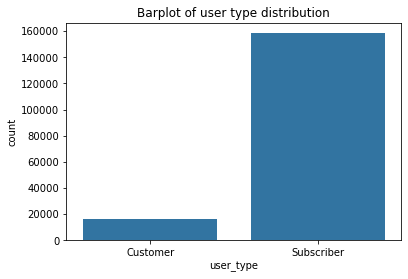

In [19]:
sns.countplot(x='user_type', data = df, color=base_color)
plt.title('Barplot of user type distribution')
plt.show()

> Subscribes are the most rides in data, only a few customers aproximately 20,000 of them are customers.

## 3. Which station has the most riders start from

In [20]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

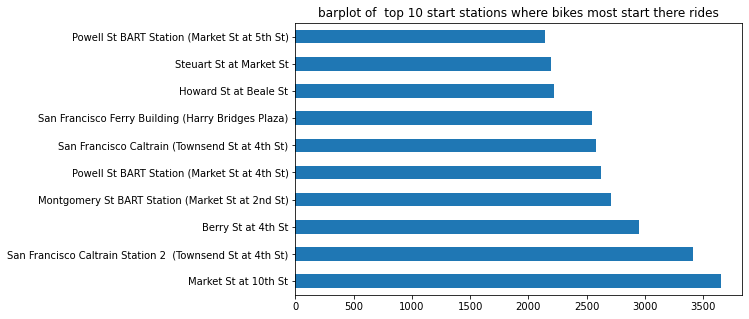

In [21]:
# get order of bars by frequency
start_station_count = df['start_station_name'].value_counts()[:10]
start_station_index = start_station_count.index

# plotting
# plot top 10 stations
plt.figure(figsize=(8,5))
df['start_station_name'].value_counts()[:10].plot(kind='barh')
plt.title("barplot of  top 10 start stations where bikes most start there rides")
plt.show()

> Market St at 10th St. is the station that has most rides starting from. followed by San Francisco Caltrain Station 2  (Townsend St at 4th St) then Berry St at 4th St respectively.

## 4. which stations has the most riders ending their journey there?

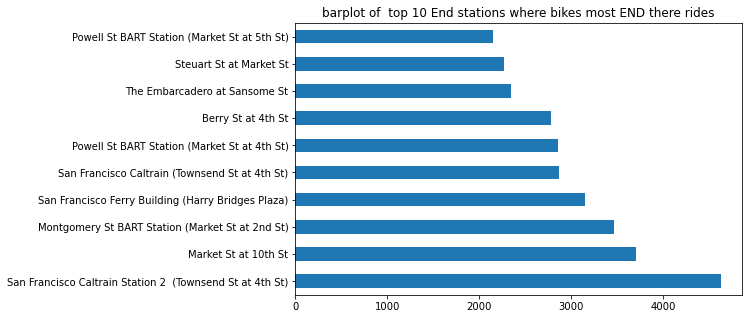

In [22]:
# plot top 10 ending stations
plt.figure(figsize=(8,5))
df['end_station_name'].value_counts()[:10].plot(kind='barh')
plt.title("barplot of  top 10 End stations where bikes most END there rides")
plt.show()

In [23]:
df['end_station_name'].value_counts()[:10]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

> San Francisco Caltrain Station 2  (Townsend St at 4th St) is the station that has most journey ending there.(rides destination) followed by Market St at 10th St, Montgomery St BART Station (Market St at 2nd St) and San Francisco Ferry Building (Harry Bridges Plaza) respectively.

#### 5. which gender is the most dominant for riding.

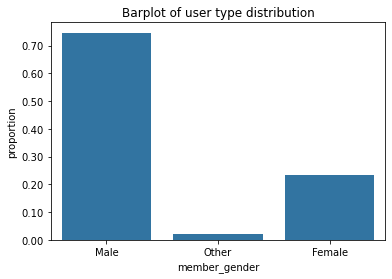

In [24]:
# get gender proportion
gender_counts = df['member_gender'].value_counts()
max_gender_count = gender_counts[0]
n_gender = df['member_gender'].value_counts().sum()
max_prop = max_gender_count / n_gender

# plotting
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sns.countplot(x='member_gender', data = df, color=base_color)
plt.yticks(tick_props * n_gender, tick_names)
plt.ylabel('proportion')
plt.title('Barplot of user type distribution')
plt.show()

> male are the most rides with a proportion of approximately slightly higher than 0.7, while female have a proportion of aproximately 0.2

#### 6. which day of the week do people love to ride

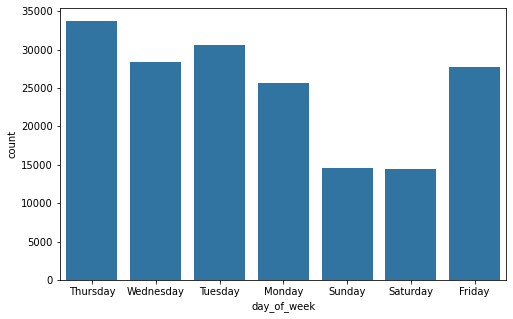

In [25]:
# get day from start time
# The day of the week with Monday=0, Sunday=6.
df['day_of_week'] = df['start_time'].dt.day_name()

plt.figure(figsize=(8, 5))
sns.countplot(x='day_of_week', data=df, color=base_color);

#### whats the age distibution of the rides

In [26]:
# get the current year of from start time
df['start_year'] = df['start_time'].dt.year
# # drop rows with missing members age
# df_no_missing = df.dropna(subset=['member_birth_year', 'member_gender'])

df['age'] = df['start_year'] - df['member_birth_year']

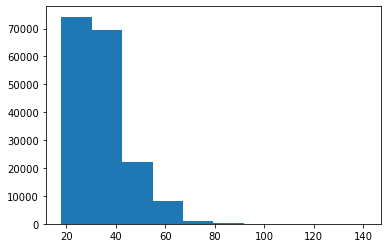

In [27]:
## plotting age

plt.hist(df['age']);

> The distribution is skewed to the right, more young people do riding than older people.

#### What is the distribution of duration seconds.

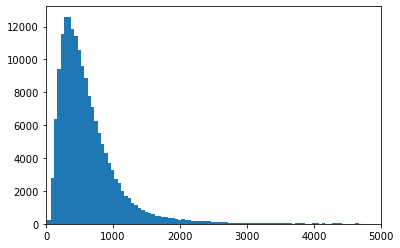

In [28]:
bins = np.arange(20, df['duration_sec'].max()+50, 50)
plt.hist(df['duration_sec'], bins=bins)
plt.xlim(0, 5000)
plt.show()

> Durations column depicts a right-skewed Distribution, people tends to ride for mostly between 0 to 1000 seconds. 

#### Distance

In [29]:
# reference -> https://dadoverflow.com/2022/01/07/pandas-and-distance-calculations/
# handy function from the article
def haversine_vectorize(lon1, lat1, lon2, lat2):
    """Returns distance, in kilometers, between one set of longitude/latitude coordinates and another"""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [30]:
df['haversine_dist'] = haversine_vectorize(
    df['start_station_longitude'], df['start_station_latitude'],
    df['end_station_longitude'], df['end_station_latitude']
)

df['haversine_dist'].head()

0    0.544367
2    2.702847
3    0.260575
4    2.407789
5    3.330111
Name: haversine_dist, dtype: float64

In [31]:
df['haversine_dist'].describe()

count    174952.000000
mean          1.688988
std           1.096268
min           0.000000
25%           0.909872
50%           1.428932
75%           2.222614
max          69.425625
Name: haversine_dist, dtype: float64

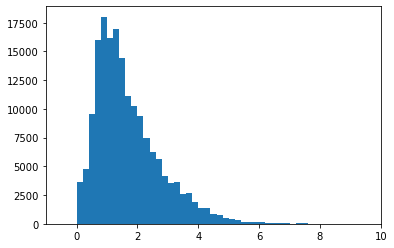

In [32]:
bins = np.arange(0, df['haversine_dist'].max()+0.2, 0.2)
plt.xlim(-1, 10)
plt.hist(df['haversine_dist'], bins=bins)
plt.show()

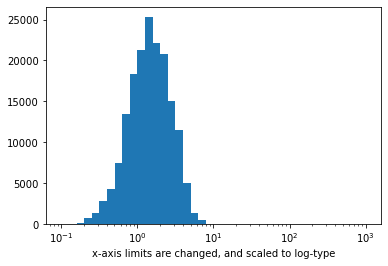

In [33]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='haversine_dist', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')
plt.show()

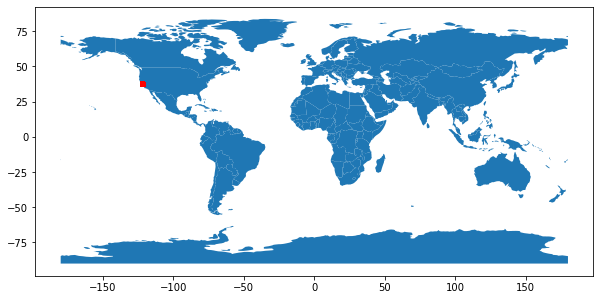

In [34]:
geometry = [Point(xy) for xy in zip(df['start_station_longitude'], df['start_station_latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

### Univariate Distributions Discussions:

> The duration variable depicts a right skewness distribution and it seems most people ride bikes for a duration of less than 1000 seconds.
> The Distance also covered depicts a right-skewness distribution, 
and most rides seems to ride between 1 to 4 haversine distance.

> For start location variable Market St at 10th St. is the station that has most rides starting from. followed by San Francisco Caltrain Station 2 (Townsend St at 4th St) then Berry St at 4th St respectively.

> For End location San Francisco Caltrain Station 2 (Townsend St at 4th St) is the station that has most journey ending there.(rides destination) followed by Market St at 10th St, Montgomery St BART Station (Market St at 2nd St) and San Francisco Ferry Building (Harry Bridges Plaza) respectively.

> Using start year and members birth year to calculate age. The age variable shows also a right-skewed distribution, most rides being between tha age of 20 and 40.

> The Gender column shows that males are the most rides with a proportion of approximately slightly higher than 0.7, while females have a proportion of aproximately 0.2

> For user_type variable, Subscribes are the most rides in data, only a few customers aproximately 20,000 of them are customers.

## Bivariate Exploration

#### user type vs gender

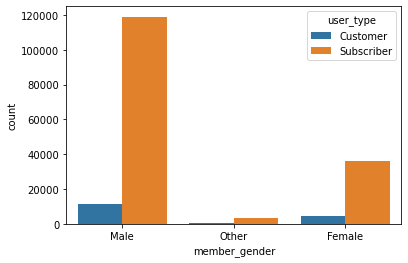

In [35]:
sns.countplot(data=df, x='member_gender', hue='user_type');

#### day_of_week vs user_type

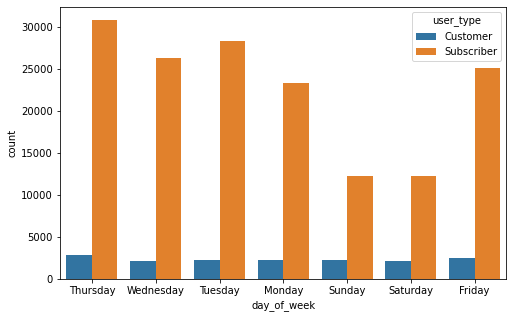

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='day_of_week', hue='user_type')
plt.show()

### Gender versus Distance

In [37]:
## Scale the distance column
#scaler = MinMaxScaler()

#df[['haversine_dist']] = scaler.fit_transform(df[['haversine_dist']])

Text(0.5, 1.0, 'Distance covered by member gender')

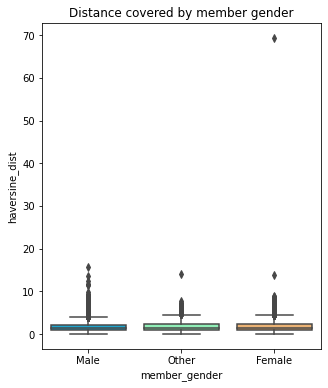

In [38]:
plt.figure(figsize=(5,6))
sns.boxplot(x='member_gender',y='haversine_dist',data=df, palette='rainbow')
plt.title("Distance covered by member gender")

> Drop outliers to improve boxplot look.

In [39]:
df_no_outliers = df[(np.abs(stats.zscore(df[['haversine_dist', 'duration_sec']])) < 3).all(axis=1)].copy()

In [40]:
df_no_outliers.shape

(172269, 22)

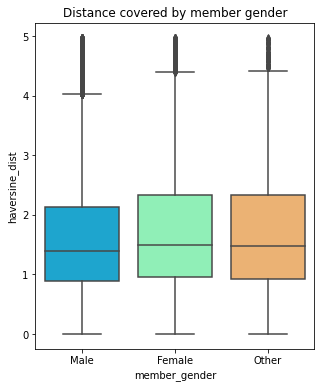

In [41]:
plt.figure(figsize=(5,6))
sns.boxplot(x='member_gender',y='haversine_dist',data=df_no_outliers, palette='rainbow')
plt.title("Distance covered by member gender")
plt.show()

>The above boxplot shows Females cover a slightly longer distance compared to their male counterparts.

> I had to drop otliers to get a good visual, since the were many outliers in the first plot of boxplots.

### Memeber Gender versus Duaration

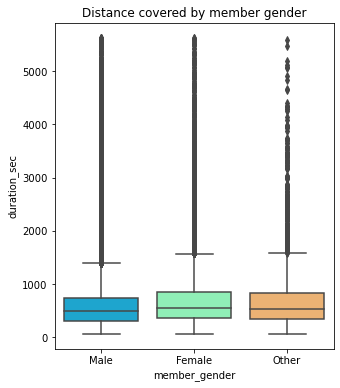

In [42]:
plt.figure(figsize=(5,6))
sns.boxplot(x='member_gender',y='duration_sec',data=df_no_outliers, palette='rainbow')
plt.title("Distance covered by member gender")
plt.show()

### Age versus distance

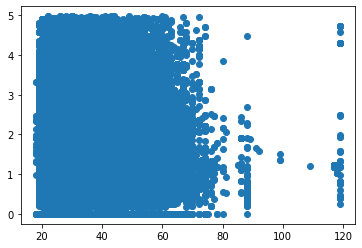

In [43]:
plt.scatter(x='age', y='haversine_dist', data=df_no_outliers);

> It has no linear correlation, as it can be depicted by the its scatterplot.

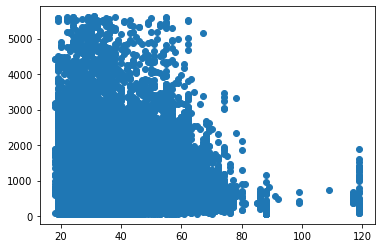

In [44]:
plt.scatter(x='age', y='duration_sec', data=df_no_outliers);

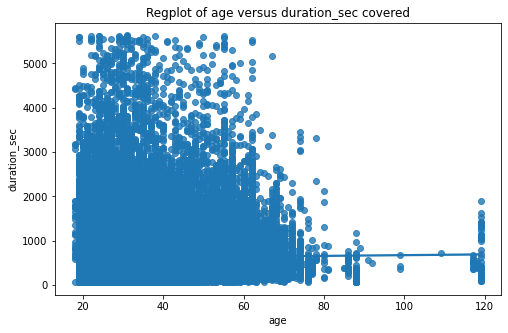

In [45]:
# draw regplot
plt.figure(figsize=(8,5))
sns.regplot(x = "age",
            y = "duration_sec",
            data = df_no_outliers)
 
# show the plot
plt.title("Regplot of age versus duration_sec covered")
plt.show()

### Duration Versus haversine_dist

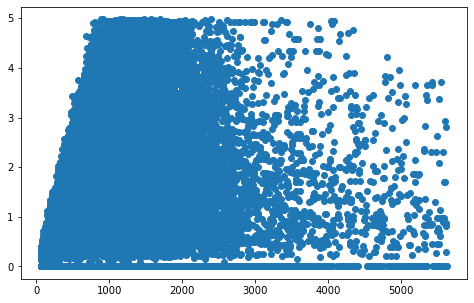

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(x='duration_sec', y='haversine_dist', data=df_no_outliers);

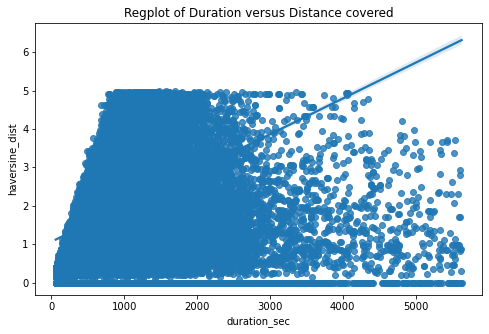

In [47]:
# draw regplot
plt.figure(figsize=(8,5))
sns.regplot(x = "duration_sec",
            y = "haversine_dist",
            data = df_no_outliers)
 
# show the plot
plt.title("Regplot of Duration versus Distance covered")
plt.show()

The relationship depict a postitve correlation, the more the duation the more the distance covered.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> One interesting finding from the analysis of the Ford GoBike System Data is that females tend to cover slightly longer distances than males, which is also reflected in the longer ride duration for females compared to males. This could be due to a variety of factors such as differences in riding habits, route preferences, or fitness levels between genders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> **Age** didn't real show aany relationship with duration or distance, I expect a negative correlation, but it didn't really show up in the plots.

## Multivariate Exploration

### Age versus Duartion compared across different genders

<Figure size 576x360 with 0 Axes>

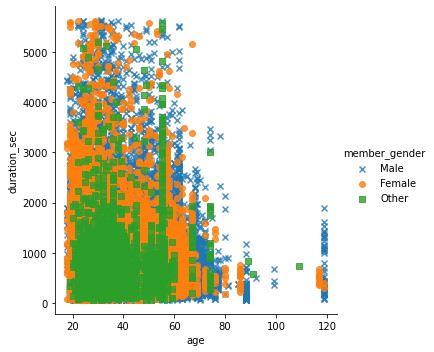

In [48]:
plt.figure(figsize=(8, 5))
sns.lmplot(x='age', y='duration_sec', hue='member_gender', 
           markers=['x', 'o', 's'],
           fit_reg=False, data=df_no_outliers);
plt.show()

> The *other* gender seeem to ride for less dUration compared to male and Females. The young Females less than 40 years seems to ride for longer duration,  while males above 40 also seems to ride for long duration. And it seems there are less females from age of 60 who ride.

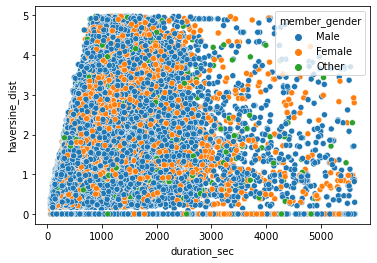

In [49]:
sns.scatterplot(x="duration_sec", y="haversine_dist", hue='member_gender', data=df_no_outliers);

>The Plot does depicts much difference between the 3 genders.

In [50]:
### HeatMap to check Correlation of age, duration and haversine_dist

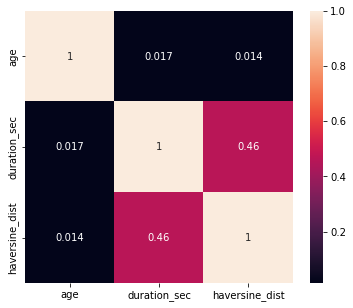

In [51]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df_no_outliers.loc[:, ['age', 'duration_sec', 'haversine_dist']].corr(),
    annot=True
)
plt.show()

> The above heatmap shows that their is a positive correlation of 0.46 between duration and distance. But Age has no correlation to both variables duration and distance.

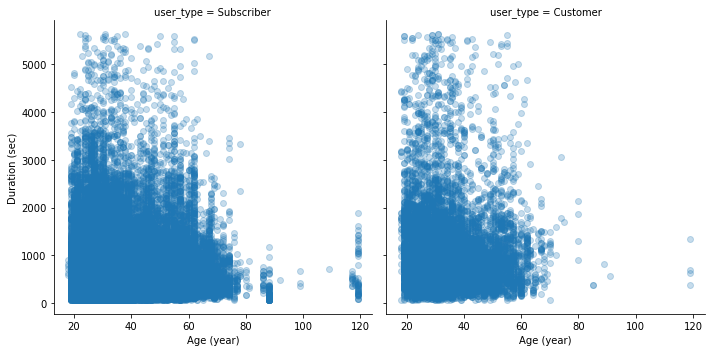

In [52]:
g = sns.FacetGrid(data = df_no_outliers, col = 'user_type', col_wrap = 2, size = 5)
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')

plt.show()

> The both seem to have same trends for duration and age

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Duration is related with distance, which comes in naturally true also. Young females rides for longer duration while older males ride longer duration also.

### Were there any interesting or surprising interactions between features?

> Yes, Age is interesting as it is not related with distance or duration seconds, and this need further investigation.

## Conclusions
>  The majority of bike-sharing system users are males.

> Young females under the age of 40 tend to ride for a longer duration compared to other age groups, while males above the age of 40 also tend to ride for a longer duration.

> Ride duration and distance are positively correlated, which is an expected relationship.

> Age has no correlation with ride duration or distance, suggesting that age may not be a significant factor in bike-sharing system usage patterns.

> There are fewer females over the age of 60 who use the bike-sharing system, which could be due to several factors such as physical limitations, accessibility, or safety concerns.